<h1>Импорт библиотек

In [1]:
%pip install numpy
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    
    result = np.zeros_like(V[0])
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)
    
    return result

class TestSumProd(unittest.TestCase):
    def test_basic_case(self):
        matrices = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
        vectors = [np.array([[1], [2]]), np.array([[3], [4]])]
        expected = np.array([[44], [64]])
        np.testing.assert_array_almost_equal(sum_prod(matrices, vectors), expected)

    def test_single_matrix_vector(self):
        matrices = [np.array([[1, 2], [3, 4]])]
        vectors = [np.array([[1], [2]])]
        expected = np.array([[5], [11]])
        np.testing.assert_array_almost_equal(sum_prod(matrices, vectors), expected)

    def test_zero_matrices_and_vectors(self):
        matrices = [np.zeros((2, 2)), np.zeros((2, 2))]
        vectors = [np.zeros((2, 1)), np.zeros((2, 1))]
        expected = np.zeros((2, 1))
        np.testing.assert_array_almost_equal(sum_prod(matrices, vectors), expected)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.012s

OK


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [4]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

class TestBinarize(unittest.TestCase):
    def test_basic_case(self):
        M = np.array([[0.1, 0.5, 0.7],
                      [0.2, 0.8, 0.4],
                      [0.9, 0.3, 0.6]])
        threshold = 0.5
        expected = np.array([[0, 0, 1],
                             [0, 1, 0],
                             [1, 0, 1]])
        np.testing.assert_array_equal(binarize(M, threshold), expected)

    def test_empty_matrix(self):
        M = np.array([])
        threshold = 0.5
        expected = np.array([])
        np.testing.assert_array_equal(binarize(M, threshold), expected)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


.....
----------------------------------------------------------------------
Ran 5 tests in 0.005s

OK


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [5]:
def unique_rows(mat):
    return [list(np.unique(row)) for row in mat]

def unique_columns(mat):
    return [list(np.unique(col)) for col in mat.T]

class TestUnique(unittest.TestCase):
    def test_unique_rows(self):
        mat = np.array([[1, 2, 2, 3],
                        [4, 4, 5, 6],
                        [7, 8, 8, 9]])
        expected = [[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]]
        result = unique_rows(mat)
        self.assertEqual(len(result), len(expected))
        for res_row, exp_row in zip(result, expected):
            self.assertEqual(res_row, exp_row)

    def test_unique_columns(self):
        mat = np.array([[1, 2, 3, 3],
                        [1, 4, 5, 5],
                        [1, 6, 7, 7]])
        expected = [[1],
                    [2, 4, 6],
                    [3, 5, 7],
                    [3, 5, 7]]
        result = unique_columns(mat)
        self.assertEqual(len(result), len(expected))
        for res_col, exp_col in zip(result, expected):
            self.assertEqual(res_col, exp_col)


if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.......
----------------------------------------------------------------------
Ran 7 tests in 0.007s

OK


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

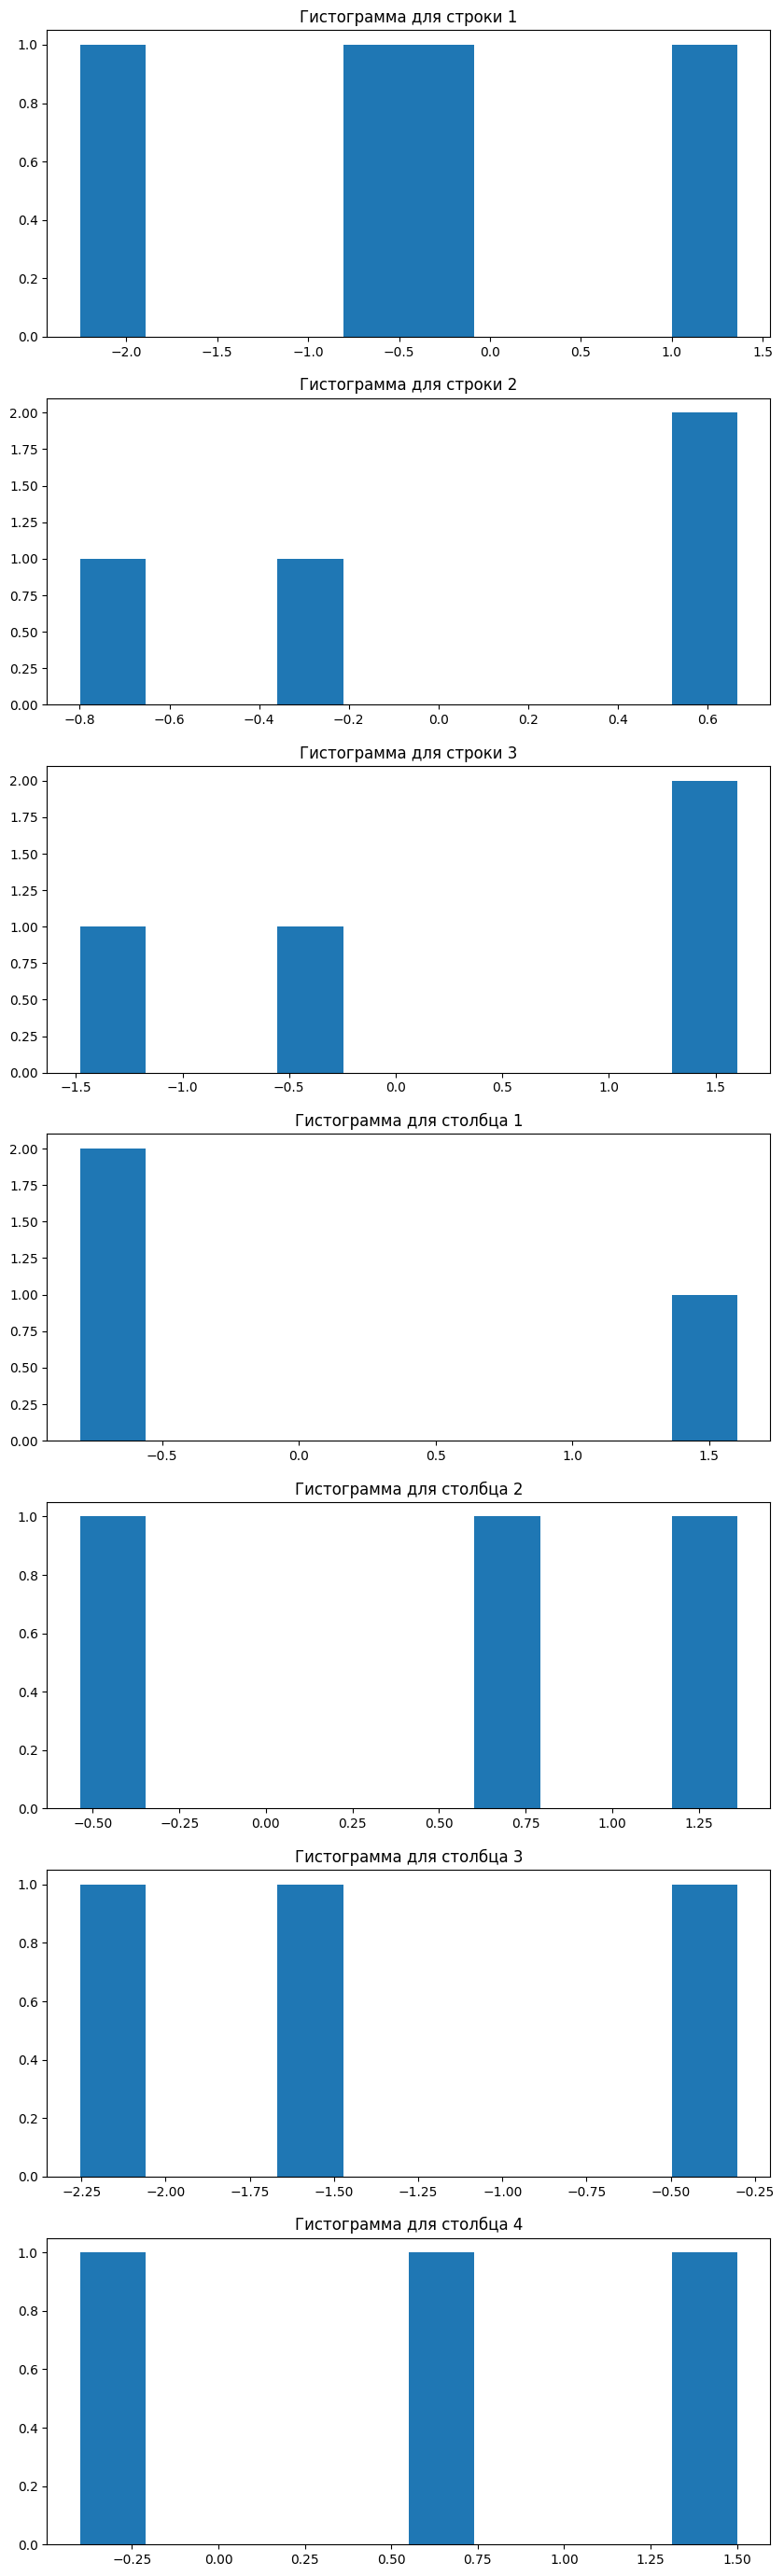

Мат. ожидания строк: [-0.52180184  0.04177038  0.27183041]
Дисперсии строк: [1.65976052 0.3824562  1.75300652]
Мат. ожидания столбцов: [ 0.00324731  0.49756226 -1.34566503  0.56725406]
Дисперсии столбцов: [1.2805743  0.61538768 0.64466315 0.60338716]


In [6]:
def analyze_matrix(m, n):
    matrix = np.random.normal(loc=0, scale=1, size=(m, n))
    
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)
    
    fig, axes = plt.subplots(m + n, 1, figsize=(10, 5*(m+n)))
    
    for i in range(m):
        axes[i].hist(matrix[i, :])
        axes[i].set_title(f'Гистограмма для строки {i+1}')
    
    for j in range(n):
        axes[m+j].hist(matrix[:, j])
        axes[m+j].set_title(f'Гистограмма для столбца {j+1}')
    
    plt.show()
    
    return row_means, row_vars, col_means, col_vars

row_means, row_vars, col_means, col_vars = analyze_matrix(3, 4)
print("Мат. ожидания строк:", row_means)
print("Дисперсии строк:", row_vars)
print("Мат. ожидания столбцов:", col_means)
print("Дисперсии столбцов:", col_vars)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [7]:
def chess(m, n, a, b):
    matrix = np.full((m, n), a)
    mask = np.indices((m, n)).sum(axis=0) % 2
    matrix[mask == 1] = b
    
    return matrix

class TestChess(unittest.TestCase):
    def test_even_dimensions(self):
        result = chess(4, 4, 1, 0)
        expected = np.array([
            [1, 0, 1, 0],
            [0, 1, 0, 1],
            [1, 0, 1, 0],
            [0, 1, 0, 1]
        ])
        np.testing.assert_array_equal(result, expected)

    def test_odd_dimensions(self):
        result = chess(3, 5, 2, 3)
        expected = np.array([
            [2, 3, 2, 3, 2],
            [3, 2, 3, 2, 3],
            [2, 3, 2, 3, 2]
        ])
        np.testing.assert_array_equal(result, expected)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)

.........
----------------------------------------------------------------------
Ran 9 tests in 0.009s

OK


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

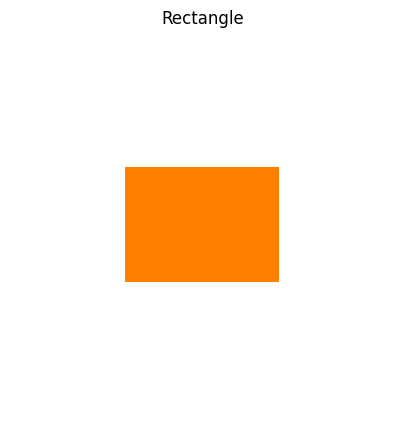

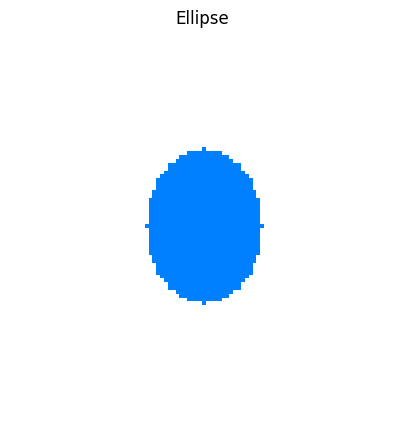

In [8]:
def draw_rectangle(m, n, a, b, bg_color, color):
    image = np.full((m, n, 3), bg_color, dtype=np.uint8)
    image[m//2 - a:m//2 + a, n//2 - b:n//2 + b] = color
    return image

def draw_ellipse(m, n, a, b, bg_color, color):
    image = np.full((m, n, 3), bg_color, dtype=np.uint8)
    y, x = np.ogrid[:m, :n]
    mask = ((x - n // 2) ** 2 / a ** 2 + (y - m // 2) ** 2 / b ** 2) <= 1
    image[mask] = color
    return image

def display_image(image, title):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

def test_rectangle():
    m, n = 100, 100
    a, b = 15, 20
    bg_color = (255, 255, 255)
    rect_color = (255, 128, 0)
    result = draw_rectangle(m, n, a, b, bg_color, rect_color)
    
    display_image(result, "Rectangle")

def test_ellipse():
    m, n = 100, 100
    a, b = 15, 20
    bg_color = (255, 255, 255)
    ellipse_color = (0, 128, 255)
    result = draw_ellipse(m, n, a, b, bg_color, ellipse_color)
    
    display_image(result, "Ellipse")

test_rectangle()
test_ellipse()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Мат. ожидание: 10.2
Дисперсия: 29.160000000000004
Станд. отклонение: 5.4
Локальные минимумы: [ 4  4 10]
Локальные максимумы: [ 8 14]
Скользящее среднее: [ 5.33333333  6.          6.          8.         10.         12.
 14.         16.        ]


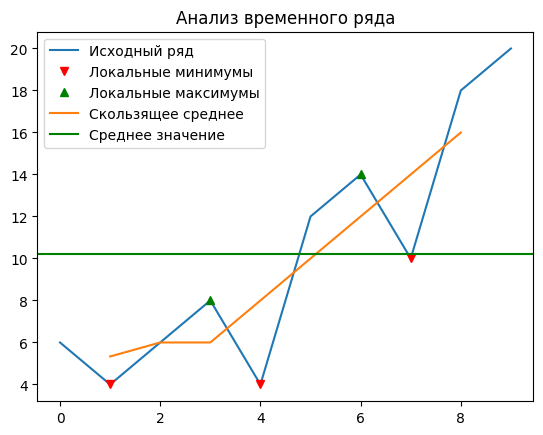

In [36]:
def analyze_time_series(row, p):
    mean = np.mean(row)
    variance = np.var(row)
    std = np.std(row)

    local_min_indices = []
    local_max_indices = []
    
    for i in range(1, len(row) - 1):
        if row[i] < row[i-1] and row[i] < row[i+1]:
            local_min_indices.append(i)
        elif row[i] > row[i-1] and row[i] > row[i+1]:
            local_max_indices.append(i)

    mov_avg = np.convolve(row, np.ones(p) / p, mode='valid')

    return mean, variance, std, local_min_indices, local_max_indices, mov_avg

row = np.array([6, 4, 6, 8, 4, 12, 14, 10, 18, 20])
p = 3

mean, variance, std, local_min_indices, local_max_indices, mov_avg = analyze_time_series(row, p)

print(f"Мат. ожидание: {mean}")
print(f"Дисперсия: {variance}")
print(f"Станд. отклонение: {std}")
print(f"Локальные минимумы: {row[local_min_indices]}")
print(f"Локальные максимумы: {row[local_max_indices]}")
print(f"Скользящее среднее: {mov_avg}")

plt.plot(row, label='Исходный ряд')
plt.plot(local_min_indices, row[local_min_indices], 'rv', label='Локальные минимумы')
plt.plot(local_max_indices, row[local_max_indices], 'g^', label='Локальные максимумы')
plt.plot(np.arange(len(mov_avg)) + p//2, mov_avg, label='Скользящее среднее')
plt.axhline(y=mean, color='g', label='Среднее значение')
plt.legend()
plt.title('Анализ временного ряда')
plt.show()


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [10]:
def one_hot_encoding(labels):
    return np.eye(np.max(labels) + 1, dtype=int)[labels]

class TestOneHotEncoding(unittest.TestCase):
    def test_basic(self):
        labels = [0, 2, 3, 0]
        expected = np.array([
            [1, 0, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [1, 0, 0, 0]
        ])
        np.testing.assert_array_equal(one_hot_encoding(labels), expected)

    def test_single_class(self):
        labels = [1, 1, 1]
        expected = np.array([
            [0, 1],
            [0, 1],
            [0, 1]
        ])
        np.testing.assert_array_equal(one_hot_encoding(labels), expected)

    def test_non_zero_based(self):
        labels = [1, 3, 5, 1]
        expected = np.array([
            [0, 1, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 0, 1],
            [0, 1, 0, 0, 0, 0]
        ])
        np.testing.assert_array_equal(one_hot_encoding(labels), expected)

if __name__ == '__main__':
    unittest.main(argv=[''], exit=False)


............
----------------------------------------------------------------------
Ran 12 tests in 0.020s

OK
